In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


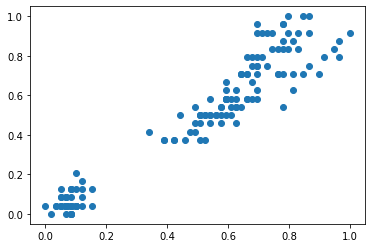

In [32]:
plt.scatter(df[['petal_length']],df[['petal_width']])
#i choose petal lenght and petal width as my two parameters, as after drawing all possible graphs, this graph had
# a better seperation


In [23]:
df = df.drop(['species','sepal_length','sepal_width'],axis = 1)

# just by looking at the data, we can say that there are Three clusters(the cluster at the right can be two custers),
# lets just draw those clusters without elbow method



In [41]:
# preprocess

scaler = MinMaxScaler()
scaler.fit(df[['petal_length']])
df['petal_length'] = scaler.transform(df[['petal_length']])

scaler = MinMaxScaler()
scaler.fit(df[['petal_width']])
df['petal_width'] = scaler.transform(df[['petal_width']])

df

,petal_length,petal_width,cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


In [42]:
km = KMeans(n_clusters = 3)
km.fit(df[['petal_length','petal_width']])


KMeans(n_clusters=3)

In [43]:
y_pred = km.predict(df[['petal_length','petal_width']])

In [44]:
df['cluster'] = y_pred
df

,petal_length,petal_width,cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


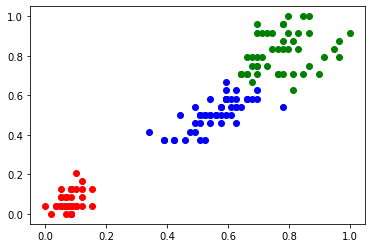

In [45]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.petal_length,df1.petal_width,color = 'r')
plt.scatter(df2.petal_length,df2.petal_width,color  = 'g')
plt.scatter(df3.petal_length,df3.petal_width,color  = 'b')

# Elbow method

In [59]:

scores = []
k =  []
for i in range(1,10):
    model  = KMeans(n_clusters = i)
    model.fit(df[['petal_length','petal_width']])
    scores.append(model.inertia_)
    k.append(i)
    

Text(0, 0.5, 'sq_sum_error')

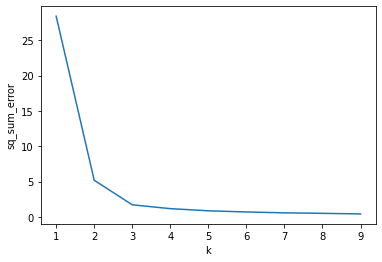

In [60]:
plt.plot(k,scores)
plt.xlabel('k')
plt.ylabel('sq_sum_error')

# Now for the whole dataset

In [88]:
df_f = pd.read_csv('IRIS.csv')
df_f = df_f.drop(['species'],axis = 1)

scaler = MinMaxScaler()
scaler.fit(df_f[['sepal_length']])
df_f['sepal_length'] = scaler.transform(df[['sepal_length']])

scaler.fit(df_f[['sepal_width']])
df_f['sepal_width'] = scaler.transform(df[['sepal_width']])

scaler.fit(df_f[['petal_length']])
df_f['petal_length'] = scaler.transform(df[['petal_length']])

scaler.fit(df_f[['petal_width']])
df_f['petal_width'] = scaler.transform(df[['petal_width']])
df_f

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [89]:
n_k = range(1,10)
scores = []

for k in n_k:
    model = KMeans(n_clusters = k)
    model.fit(df_f.iloc[:,:])
    scores.append(model.inertia_)

Text(0, 0.5, 'sq_sum_error')

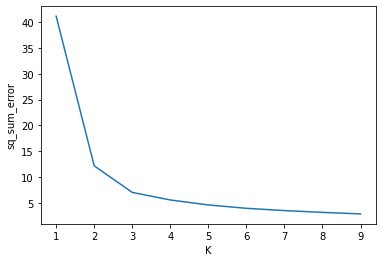

In [90]:
plt.plot(n_k,scores)
plt.xlabel("K")
plt.ylabel('sq_sum_error')

# n = 3

In [91]:
km  = KMeans(n_clusters = 3)
km.fit(df_f.iloc[:,:])

KMeans(n_clusters=3)

In [92]:
y = km.predict(df_f.iloc[:,:])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])